# Load Spatial Data Frame - altered Esri DevLab Sample
This is my modfied sample from the [Load spatial data frame](https://developers.arcgis.com/labs/python/load-spatial-data-frame/) ArcGIS DevLab.

In [1]:
from arcgis.gis import GIS
import arcpy
from getpass import getpass
from arcgis.features import SpatialDataFrame

Log into ArcGIS Online by making a GIS connection using your developer account. Replace `username` and `password` with your own credentials.

In [2]:
gis = GIS(arcpy.GetActivePortalURL(), username=input("Enter User Name "), password=(getpass()))
#gis = GIS(arcpy.GetActivePortalURL())
#gis = GIS("https://www.arcgis.com")
portal_desc = arcpy.GetPortalDescription()
print(f'Connected to Organization {portal_desc["name"]}\nPortal Name {portal_desc["portalName"]} as user {portal_desc["user"]["username"]}')

Enter User Name arcgiswebservices
········
Connected to Organization Gainesville Regional Utilities - Gainesville, FL
Portal Name ArcGIS Online as user arcgiswebservices


Search for the *Griffith Park Access* layer used in the [Create a new dataset](https://developers.arcgis.com/labs/arcgisonline/create-a-new-dataset/) DevLab.

<Item title:"AerialCable" type:Feature Layer Collection owner:arcgiswebservices>
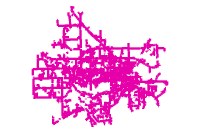

Use AerialCable [Y,N] n


<Item title:"CW_BaseMap" type:Feature Layer Collection owner:arcgiswebservices>
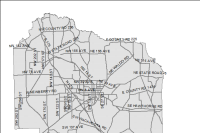

Use CW_BaseMap [Y,N] y


In [3]:
# search and list all items owned by connected user
query=f'owner:{portal_desc["user"]["username"]} AND type: "Feature Service"'
#query=f'type: "Feature Service"'
#itemType="Feature Layer"
sortField="title"
sortOrder="asc"
# default max__items is 10
maxItems=100
searchResult = gis.content.search(query,'',sortField,sortOrder,maxItems)
for i in range(len(searchResult)):
    display(searchResult[i])
    updateResult = input(f'Use {(searchResult[i].title)} [Y,N] ')
    if updateResult.upper() in "YES":
        sdItem = searchResult[i]
        #print(sdItem.title, sdItem.id, sdItem.modified, sdItem.access)
        break
#if updateResult.upper() not in "YES":
#    print(f'All Service Definitions in your Content on {portal} were presented')
#feature_service_srch_results = gis.content.search(query='title: "Griffith*" AND type: "Feature Service"')
#feature_service_srch_results

Retrieve the feature service item from the list of results. Then, get the layer from that service.

In [ ]:
for i in range(len(sdItem.layers)):
    display(sdItem.layers[i])
    sdf = SpatialDataFrame.from_layer(sdItem.layers[i])
    sdf.head()
#feature_service_item = feature_service_srch_results[0]
#feature_layer = feature_service_item.layers[0]
#feature_layer

Build the [Spatial Data Frame](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#spatialdataframe)!

In [5]:
sdf = SpatialDataFrame.from_layer(sdItem.layers[1])
sdf.head()

,Calc_Acreage,GlobalID,Hyperlink,LotNumber,OBJECTID,TaxParcelID,created_date,created_user,last_edited_date,last_edited_user,SHAPE
0,0.095728,98767599-ac38-48f7-ad28-c61d5dbcc265,http://www.acpafl.org/ParcelResults.asp?Parcel...,None,679,06600-055-000,1468259533461,friendde,1468259533461,friendde,"{'rings': [[[2632942.21284588, 240825.32784037..."
1,0.160908,f53080a6-533b-48e9-ab6a-6aed2fa5d3dd,http://www.acpafl.org/ParcelResults.asp?Parcel...,None,680,06600-055-000,1468259533461,friendde,1468259533461,friendde,"{'rings': [[[2632521.10284588, 240679.60784037..."
2,2.904855,d583f5df-dd41-40e4-b72b-98d43ac82072,http://www.acpafl.org/ParcelResults.asp?Parcel...,,695,04422-300-000,1468259533461,friendde,1468259533461,friendde,"{'rings': [[[2617416.76284587, 237870.85784037..."
3,1.010618,8b4122b6-9a77-42c7-a7dc-8f9825d2d69b,http://www.acpafl.org/ParcelResults.asp?Parcel...,19,696,04422-300-019,1468259533461,friendde,1468259533461,friendde,"{'rings': [[[2617414.58284587, 238152.40784037..."
4,5.527409,a430ef56-ad2c-411d-af06-eee7de234c0d,http://www.acpafl.org/ParcelResults.asp?Parcel...,6,6513,03037-001-000,1468259533461,friendde,1468259533461,friendde,"{'rings': [[[2585814.25284587, 299651.50784036..."
